# House Price - Linear Regression

## Parte 03 - Machine Learning - Rodagem com as variaveis mais importantes

#### > Importação das Bibliotecas

In [1]:
pip install xgboost

In [2]:
import matplotlib.pyplot as plt  
import numpy as np 
import pandas as pd  
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from statsmodels.formula.api import ols
from xgboost import XGBRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### > Carregamento do Dataset

Carregamento do dataset **'house_data.csv'**. O comando 'set_option' permite que a tabela seja apresentada sem simplicação 

In [3]:
df0 = pd.read_csv('house_data.csv')
pd.set_option('max_columns', None)

#### 1. Primeira Rodagem

Nessa primeira rodagem, serão colocados todos os dados do dataset, com a intenção de prever o preço da casa

##### > Separando os Dados

Colocando todas as colunas como variaveis

In [4]:
df = df0.copy()

In [5]:
df.columns

Index(['date', 'day', 'month', 'year', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'age_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   day            21613 non-null  int64  
 2   month          21613 non-null  int64  
 3   year           21613 non-null  int64  
 4   price          21613 non-null  float64
 5   bedrooms       21613 non-null  int64  
 6   bathrooms      21613 non-null  float64
 7   sqft_living    21613 non-null  int64  
 8   sqft_lot       21613 non-null  int64  
 9   floors         21613 non-null  float64
 10  waterfront     21613 non-null  int64  
 11  view           21613 non-null  int64  
 12  condition      21613 non-null  int64  
 13  grade          21613 non-null  int64  
 14  sqft_above     21613 non-null  int64  
 15  sqft_basement  21613 non-null  int64  
 16  age_built      21613 non-null  int64  
 17  yr_renovated   21613 non-null  int64  
 18  zipcod

Transformando os tipos de variaveis

In [7]:
df['date']=df['date'].astype('datetime64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21613 non-null  datetime64[ns]
 1   day            21613 non-null  int64         
 2   month          21613 non-null  int64         
 3   year           21613 non-null  int64         
 4   price          21613 non-null  float64       
 5   bedrooms       21613 non-null  int64         
 6   bathrooms      21613 non-null  float64       
 7   sqft_living    21613 non-null  int64         
 8   sqft_lot       21613 non-null  int64         
 9   floors         21613 non-null  float64       
 10  waterfront     21613 non-null  int64         
 11  view           21613 non-null  int64         
 12  condition      21613 non-null  int64         
 13  grade          21613 non-null  int64         
 14  sqft_above     21613 non-null  int64         
 15  sqft_basement  2161

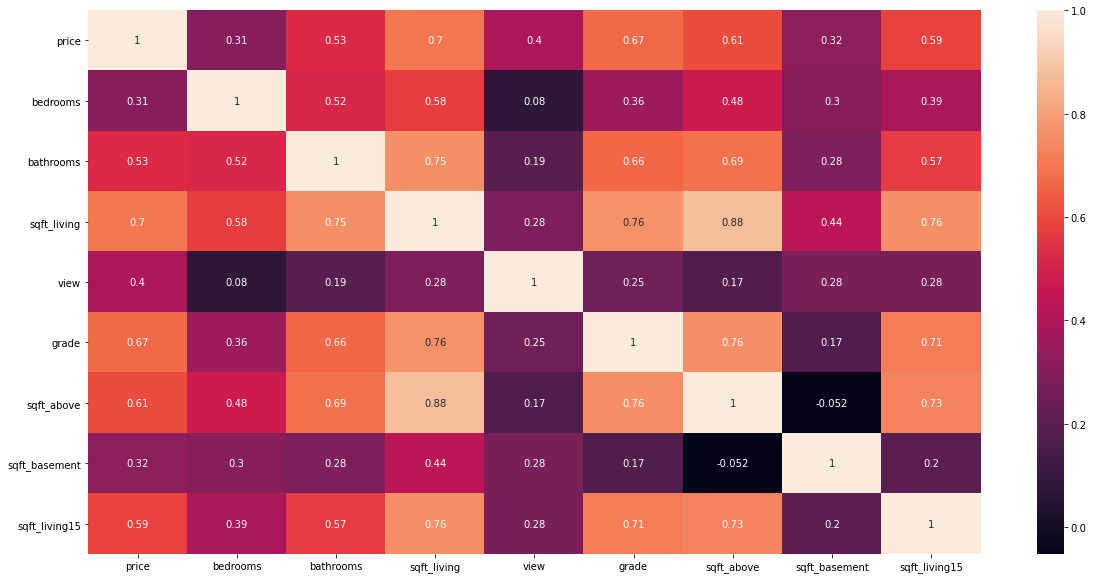

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df[['price','bedrooms', 'bathrooms','sqft_living','view','grade', 'sqft_above', 'sqft_basement', 'sqft_living15']].corr(), annot=True)
plt.show()

Colocando as features em uma variavel

In [10]:
X = df[['bedrooms', 'bathrooms','sqft_living','view','sqft_basement','sqft_above']]

Colocando a coluna 'price' como nossa variavel resposta

In [11]:
y = df['price']

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


Realizando a separação dos dados em Treino e Teste, onde 30% dos dados serão de teste

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Metrica para validação dos dados

In [13]:
def acc_reg(y_pred,y_test,tolerancia):
    
    df_final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    df_final['error']=1-df_final['Predicted']/df_final['Actual']
    
    ((df_final['error']<tolerancia) & (df_final['error']>-tolerancia)).value_counts()
    
    Falso = ((df_final['error']<tolerancia) & (df_final['error']>-tolerancia)).value_counts()[0]
    
    Verdadeiro = ((df_final['error']<tolerancia) & (df_final['error']>-tolerancia)).value_counts()[1]
    
    Acc = Verdadeiro/(Falso+Verdadeiro)*100
    
    return round(Acc,2)

#### > LinearRegression

##### > Verificação dos resultados

In [14]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lrr = r2_score(y_test, y_pred)
MAElr = mean_absolute_error(y_test, y_pred)
MSElr = mean_squared_error(y_test, y_pred)
RMSElr = np.sqrt(mean_squared_error(y_test, y_pred))
print('Coefficient:', lr.coef_)
print('Intercept:', lr.intercept_)
print('R^2: %.2f ' % lrr)
print('Mean Absolute error:', MAElr)
print('Mean Squared error:', MSElr )
print('Root Mean Squared Error:', RMSElr )

Coefficient: [-4.36914990e+04  1.18281648e+04  5.31660412e+15  9.73398627e+04
 -5.31660412e+15 -5.31660412e+15]
Intercept: 62632.04794679
R^2: 0.55 
Mean Absolute error: 168870.75023223727
Mean Squared error: 68633814749.4654
Root Mean Squared Error: 261980.56177790253


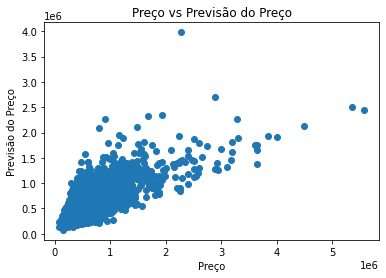

In [15]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [16]:
lrp = acc_reg(y_pred,y_test,0.1)
lrp

20.98

In [17]:
Linear = ['LinearRegression',lrr,MAElr,MSElr,RMSElr,lrp]
Linear

['LinearRegression',
 0.5460027293565346,
 168870.75023223727,
 68633814749.4654,
 261980.56177790253,
 20.98]

#### > KNN Regressor

##### > Verificação dos resultados

In [18]:
knn = KNeighborsRegressor(n_neighbors=5,metric='euclidean')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knnr = r2_score(y_test, y_pred)
MAEknn = mean_absolute_error(y_test, y_pred)
MSEknn = mean_squared_error(y_test, y_pred)
RMSEknn = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % knnr)
print('Mean Absolute error:', MAEknn)
print('Mean Squared error:', MSEknn )
print('Root Mean Squared Error:', RMSEknn )

R^2: 0.47 
Mean Absolute error: 175747.24533888503
Mean Squared error: 80278575969.72523
Root Mean Squared Error: 283334.741903857


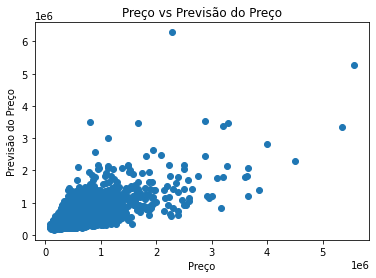

In [19]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [20]:
knnp = acc_reg(y_pred,y_test,0.1)
knnp

21.98

In [21]:
KNN = ['KNN Regressor',knnr,MAEknn,MSEknn,RMSEknn,knnp]
KNN

['KNN Regressor',
 0.4689752490891055,
 175747.24533888503,
 80278575969.72523,
 283334.741903857,
 21.98]

#### > Decision Tree

##### > Verificação dos resultados

In [22]:
dct = DecisionTreeRegressor(random_state=42)
dct.fit(X_train, y_train)
y_pred = dct.predict(X_test)
dtr = r2_score(y_test, y_pred)
MAEdt = mean_absolute_error(y_test, y_pred)
MSEdt = mean_squared_error(y_test, y_pred)
RMSEdt = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % dtr)
print('Mean Absolute error:', MAEdt)
print('Mean Squared error:', MSEdt )
print('Root Mean Squared Error:', RMSEdt )

R^2: 0.24 
Mean Absolute error: 203228.931656122
Mean Squared error: 115605305354.72044
Root Mean Squared Error: 340007.8019027217


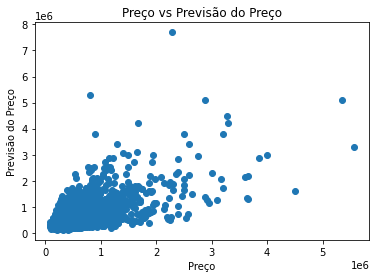

In [23]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [24]:
dtp = acc_reg(y_pred,y_test,0.1)
dtp

19.99

In [25]:
DT = ['Decision Tree',dtr,MAEdt,MSEdt,RMSEdt,dtp]
DT

['Decision Tree',
 0.23529686795740457,
 203228.931656122,
 115605305354.72044,
 340007.8019027217,
 19.99]

#### > Random Forest

##### > Verificação dos resultados

In [26]:
rft = RandomForestRegressor(n_estimators=100, random_state=26)
rft.fit(X_train, y_train)
y_pred = rft.predict(X_test)
rfr = r2_score(y_test, y_pred)
MAErf = mean_absolute_error(y_test, y_pred)
MSErf = mean_squared_error(y_test, y_pred)
RMSErf = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % rfr)
print('Mean Absolute error:', MAErf)
print('Mean Squared error:', MSErf )
print('Root Mean Squared Error:', RMSErf )

R^2: 0.52 
Mean Absolute error: 168568.68444927124
Mean Squared error: 72904490588.11728
Root Mean Squared Error: 270008.3157758614


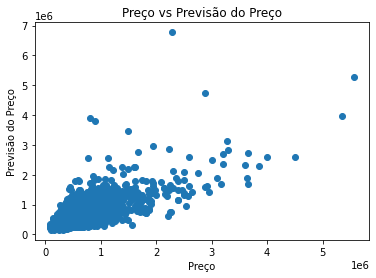

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [28]:
rfp = acc_reg(y_pred,y_test,0.1)
rfp

22.3

In [29]:
RF = ['Random Forest',rfr,MAErf,MSErf,RMSErf,rfp]
RF

['Random Forest',
 0.5177531678010763,
 168568.68444927124,
 72904490588.11728,
 270008.3157758614,
 22.3]

#### > Bagging

##### > Verificação dos resultados

In [30]:
bag_base = DecisionTreeRegressor(random_state=26)
bag = BaggingRegressor(base_estimator=bag_base, n_estimators=10, random_state=26)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
bagr = r2_score(y_test, y_pred)
MAEbag = mean_absolute_error(y_test, y_pred)
MSEbag = mean_squared_error(y_test, y_pred)
RMSEbag = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % bagr)
print('Mean Absolute error:', MAEbag)
print('Mean Squared error:', MSEbag )
print('Root Mean Squared Error:', RMSEbag)

R^2: 0.47 
Mean Absolute error: 172394.42427731486
Mean Squared error: 79648998601.40598
Root Mean Squared Error: 282221.54170333274


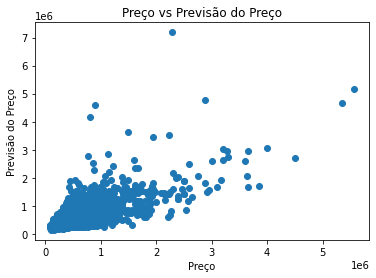

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [32]:
bagp = acc_reg(y_pred,y_test,0.1)
bagp

21.05

In [33]:
BAG = ['Bagging',bagr,MAEbag,MSEbag,RMSEbag,bagp]
BAG

['Bagging',
 0.4731397619887483,
 172394.42427731486,
 79648998601.40598,
 282221.54170333274,
 21.05]

#### > Ensemble

##### > Verificação dos resultados

In [34]:
rft2 = RandomForestRegressor(n_estimators=10, random_state=26)
ens = VotingRegressor([('LR', lr), ('RF', rft2)])
ens.fit(X_train, y_train)
y_pred = ens.predict(X_test)
ensr = r2_score(y_test, y_pred)
MAEens = mean_absolute_error(y_test, y_pred)
MSEens = mean_squared_error(y_test, y_pred)
RMSEens = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % ensr)
print('Mean Absolute error:', MAEens)
print('Mean Squared error:', MSEens )
print('Root Mean Squared Error:', RMSEens)

R^2: 0.56 
Mean Absolute error: 164100.8761604778
Mean Squared error: 66250461419.34048
Root Mean Squared Error: 257391.64986327835


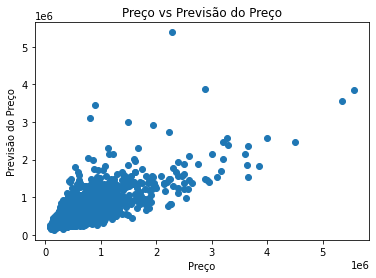

In [35]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [36]:
ensp = acc_reg(y_pred,y_test,0.1)
ensp

21.24

In [37]:
ENS = ['Ensemble',ensr,MAEens,MSEens,RMSEens,ensp]
ENS

['Ensemble',
 0.5617680763768845,
 164100.8761604778,
 66250461419.34048,
 257391.64986327835,
 21.24]

#### > Gradient Boosting Regressor

##### > Verificação dos resultados

In [38]:
gbos = GradientBoostingRegressor(max_depth=7,random_state=42)
gbos.fit(X_train, y_train)
y_pred = gbos.predict(X_test)
gbosr = r2_score(y_test, y_pred)
MAEgbos = mean_absolute_error(y_test, y_pred)
MSEgbos = mean_squared_error(y_test, y_pred)
RMSEgbos = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % gbosr)
print('Mean Absolute error:', MAEgbos)
print('Mean Squared error:', MSEgbos )
print('Root Mean Squared Error:', RMSEgbos)

R^2: 0.52 
Mean Absolute error: 162059.60415255293
Mean Squared error: 72558650889.6111
Root Mean Squared Error: 269367.1303065968


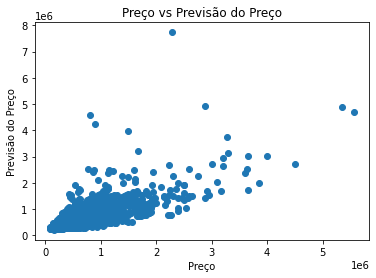

In [39]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [40]:
gbosp = acc_reg(y_pred,y_test,0.1)
gbosp

21.42

In [41]:
GBOS = ['Gradient Boosting',gbosr,MAEgbos,MSEgbos,RMSEgbos,gbosp]
GBOS

['Gradient Boosting',
 0.5200408197372991,
 162059.60415255293,
 72558650889.6111,
 269367.1303065968,
 21.42]

#### > XGBoost Regressor

##### > Verificação dos resultados

In [42]:
xgb = XGBRegressor(max_depth=4,random_state=42).fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgbr = r2_score(y_test, y_pred)
MAExgb = mean_absolute_error(y_test, y_pred)
MSExgb = mean_squared_error(y_test, y_pred)
RMSExgb = np.sqrt(mean_squared_error(y_test, y_pred))
print('R^2: %.2f ' % xgbr)
print('Mean Absolute error:', MAExgb)
print('Mean Squared error:', MSExgb )
print('Root Mean Squared Error:', RMSExgb)

R^2: 0.50 
Mean Absolute error: 163240.36427249596
Mean Squared error: 75171215921.61162
Root Mean Squared Error: 274173.6966260834


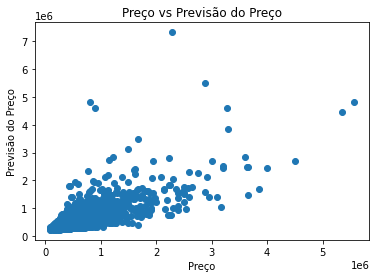

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel('Preço')
plt.ylabel('Previsão do Preço')
plt.title('Preço vs Previsão do Preço')
plt.show()

In [44]:
xgbp = acc_reg(y_pred,y_test,0.1)
xgbp

20.7

In [45]:
XGB = ['XGBoost Regressor',xgbr,MAExgb,MSExgb,RMSExgb,xgbp]
XGB

['XGBoost Regressor',
 0.5027592887858808,
 163240.36427249596,
 75171215921.61162,
 274173.6966260834,
 20.7]

#### > OLS

##### > Verificação dos resultados

In [46]:
m=ols('price~bedrooms+bathrooms+sqft_living+view+sqft_basement+sqft_above',df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5174.
Date:                Fri, 09 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:29:09   Log-Likelihood:            -2.9910e+05
No. Observations:               21613   AIC:                         5.982e+05
Df Residuals:                   21607   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.488e+04   6689.709     11.193

In [47]:
Ter = pd.DataFrame([Linear,KNN,DT,RF,BAG,ENS,GBOS,XGB],columns=['TIPO','R²','MAE','MSE','RMSE','ACURACIA %'])
Ter

,TIPO,R²,MAE,MSE,RMSE,ACURACIA %
0,LinearRegression,0.546003,168870.750232,6.863381e+10,261980.561778,20.98
1,KNN Regressor,0.468975,175747.245339,8.027858e+10,283334.741904,21.98
2,Decision Tree,0.235297,203228.931656,1.156053e+11,340007.801903,19.99
3,Random Forest,0.517753,168568.684449,7.290449e+10,270008.315776,22.30
4,Bagging,0.473140,172394.424277,7.964900e+10,282221.541703,21.05
5,Ensemble,0.561768,164100.876160,6.625046e+10,257391.649863,21.24
6,Gradient Boosting,0.520041,162059.604153,7.255865e+10,269367.130307,21.42
7,XGBoost Regressor,0.502759,163240.364272,7.517122e+10,274173.696626,20.70


In [48]:
model = [lr, knn, dct, rft, bag_base, gbos, xgb]

for i in model:
    
    i.fit(X_train,y_train)
    y_pred = i.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print(i)
    print('R^2: %.2f '%r2)
    print('Mean Absolute error:', MAE)
    print('Mean Squared error:', MSE )
    print('Root Mean Squared Error:', RMSE)
    acc_reg(y_pred,y_test,0.1)
    print('--------------------------------------')
    print('=======================================')
    print('--------------------------------------')

LinearRegression()
R^2: 0.55 
Mean Absolute error: 168870.75023223727
Mean Squared error: 68633814749.4654
Root Mean Squared Error: 261980.56177790253
--------------------------------------
--------------------------------------
KNeighborsRegressor(metric='euclidean')
R^2: 0.47 
Mean Absolute error: 175747.24533888503
Mean Squared error: 80278575969.72523
Root Mean Squared Error: 283334.741903857
--------------------------------------
--------------------------------------
DecisionTreeRegressor(random_state=42)
R^2: 0.24 
Mean Absolute error: 203228.931656122
Mean Squared error: 115605305354.72044
Root Mean Squared Error: 340007.8019027217
--------------------------------------
--------------------------------------
RandomForestRegressor(random_state=26)
R^2: 0.52 
Mean Absolute error: 168568.68444927124
Mean Squared error: 72904490588.11728
Root Mean Squared Error: 270008.3157758614
--------------------------------------
--------------------------------------
DecisionTreeRegressor(ran